In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Name doesn't seem to be an important factor. Passenger id also doesn't matter.
train_data.drop(['Name'],axis=1,inplace=True)
train_data.drop(['PassengerId'],axis=1,inplace=True)
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Do the same for test
test_data.drop(['Name'],axis=1,inplace=True)
test_data.drop(['PassengerId'],axis=1,inplace=True)

In [6]:
#Too many(~77%) NaN in Cabin
sum(train_data.Cabin.isnull())/len(train_data.Cabin)

0.7710437710437711

In [7]:
#So drop it
train_data.drop(['Cabin'],axis=1,inplace=True)
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [8]:
#Do the same for test
test_data.drop(['Cabin'],axis=1,inplace=True)

In [9]:
#Ticket id seems random, so drop it.
train_data.drop(['Ticket'],axis=1,inplace=True)
train_data.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S


In [10]:
#Do the same for test
test_data.drop(['Ticket'],axis=1,inplace=True)

In [11]:
from collections import Counter
#What types of values are in Embarked?
embSet=Counter()
for c in train_data.Embarked:
    embSet[c]+=1
embSet
#Not many NaN, so replace it with the mode val
train_data['Embarked'].fillna('S',inplace=True)

In [12]:
#Do the same for test
test_data['Embarked'].fillna('S',inplace=True)

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

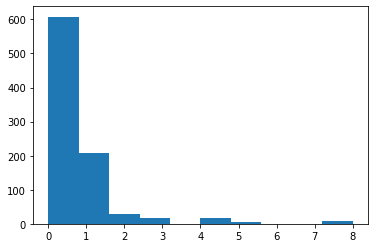

In [13]:
import matplotlib.pyplot as plt
#There is no NaN in SibSp. But what is it?
plt.hist(train_data['SibSp'])

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

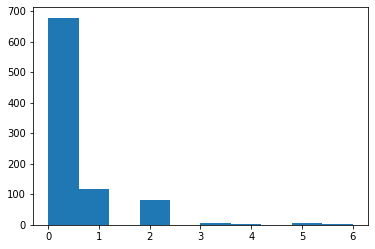

In [14]:
#There is no NaN in SibSp. But what is it?
plt.hist(train_data['Parch'])

In [15]:
train_data.groupby(['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [16]:
train_data[train_data['Pclass']==1]['Fare'].sort_values()

633      0.0000
822      0.0000
815      0.0000
806      0.0000
263      0.0000
         ...   
88     263.0000
341    263.0000
679    512.3292
258    512.3292
737    512.3292
Name: Fare, Length: 216, dtype: float64

In [17]:
fare0_ind=train_data[train_data['Fare']==0].index
for i in range(train_data.shape[0]):
    if train_data.loc[i,'Fare']==0:
        if train_data.loc[i,'Pclass']==1:
            train_data.loc[i,'Fare']=84.154687
        elif train_data.loc[i,'Pclass']==2:
            train_data.loc[i,'Fare']=20.662183
        else:
            train_data.loc[i,'Fare']=13.675550

In [18]:
test_data.groupby(['Pclass'])['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [19]:
fare0_ind=test_data[test_data['Fare']==0].index
for i in range(test_data.shape[0]):
    if test_data.loc[i,'Fare']==0:
        if test_data.loc[i,'Pclass']==1:
            test_data.loc[i,'Fare']=94.280297
        elif train_data.loc[i,'Pclass']==2:
            train_data.loc[i,'Fare']=22.202104
        else:
            train_data.loc[i,'Fare']=12.459678

In [20]:
test_data[test_data['Fare']==0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [21]:
test_data[test_data['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [22]:
test_data.loc[152,['Fare']]=12.459678

In [23]:
test_data[test_data['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [24]:
train_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [25]:
#There are many missing age info. How can we reasonably fill it?
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [26]:
# Convert string data into numeric
train_data['Sex']=train_data['Sex'].map({'male':1,'female':2})
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,2,38.0,1,0,71.2833,C
2,1,3,2,26.0,0,0,7.9250,S
3,1,1,2,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [27]:
# Do the same for teset
test_data['Sex']=test_data['Sex'].map({'male':1,'female':2})

In [28]:
import seaborn as sns

In [29]:
train_y=train_data['Survived']
train_x=train_data.drop(['Survived'],axis=1)

In [30]:
test_x=test_data

In [31]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
ind_to_drop=train_x[train_x.Age.isnull()].index
temp=train_x.drop(ind_to_drop,axis=0)
y=temp['Age']
x=np.array(temp['Fare']).reshape(-1, 1)
model.fit(x,y)

LinearRegression()

In [33]:
for i in range(train_x.shape[0]):
    if np.isnan(train_x.loc[i,'Age']):
        train_x.loc[i,'Age']=model.predict(np.array([train_x.loc[i,'Fare']]).reshape(-1,1))[0]

In [34]:
model=LinearRegression()
ind_to_drop=test_x[test_x.Age.isnull()].index
temp=test_x.drop(ind_to_drop,axis=0)
y=temp['Age']
x=np.array(temp['Fare']).reshape(-1, 1)
model.fit(x,y)

LinearRegression()

In [35]:
for i in range(test_x.shape[0]):
    if np.isnan(test_x.loc[i,'Age']):
        test_x.loc[i,'Age']=model.predict(np.array([test_x.loc[i,'Fare']]).reshape(-1,1))[0]

In [36]:
train_x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
#Let's hot encode the feature 'Embarked'
train_x=pd.get_dummies(train_x)
#Do the same for test
test_x=pd.get_dummies(test_x)

In [38]:
test_x.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [39]:
train_y=np.array(train_y).ravel()

In [40]:
#Preprocess data(standardize it)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('std_scaler',StandardScaler())
])
train_x=pipeline.fit_transform(train_x)
test_x=pipeline.fit_transform(test_x)

In [41]:
#Until now, we have done without cross-validation. Now, let's do model selection using cross-validation.

In [42]:
#Cross validation
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_x,train_y,test_size=0.2)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [45]:
def fitNpredict(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_val)
    return accuracy_score(y_val,y_pred)
def crossval(model):
    return cross_val_score(model, train_x,train_y, cv=5).mean()
#m1 = LogisticRegression()

#m4 = SGDClassifier()
m3 = RandomForestClassifier(n_estimators=1000,
                              max_depth=5,
                              min_samples_split=5,
                              min_samples_leaf=5,
                              max_features=None,
                              oob_score=True,
                              random_state=42)
print('Accuracy:',fitNpredict(m3))
print('Cross validation score:',crossval(m3))

Accuracy: 0.8603351955307262
Cross validation score: 0.8204695248258111


In [46]:
final_model=m3
final_model.fit(train_x,train_y)
predict_yf=final_model.predict(test_x)

In [47]:
test_y=pd.DataFrame({'PassengerId':np.array(np.arange(892,1310)),'Survived':predict_yf})

In [48]:
test_y.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
